In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/script1/train.py
/kaggle/input/script1/model.py
/kaggle/input/cifar10-image-recognition/train.npy
/kaggle/input/cifar10-image-recognition/trainLabels.csv
/kaggle/input/cifar10-image-recognition/sampleSubmission.csv
/kaggle/input/cifar10-image-recognition/test.npy


In [4]:
!cp /kaggle/input/script1/*.py .

In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Total parameters: 195,946
Estimated receptive field: 45


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/kaggle/working/train.py:55: UserWarning: Argument(s) 'num_holes, max_h_size, max_w_size, min_h_size, min_w_size, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(
100%|██████████| 170M/170M [00:02<00:00, 63.2MB/s] 


Epoch 1/30 | LR(s): [0.001379] | Train loss 2.0513 acc 0.2223 | Val loss 1.7977 acc 0.3191
Epoch 2/30 | LR(s): [0.003047] | Train loss 1.6890 acc 0.3617 | Val loss 1.5001 acc 0.4467
Epoch 3/30 | LR(s): [0.005602] | Train loss 1.4249 acc 0.4784 | Val loss 1.3413 acc 0.5207
Epoch 4/30 | LR(s): [0.008737] | Train loss 1.2469 acc 0.5525 | Val loss 1.0777 acc 0.6128
Epoch 5/30 | LR(s): [0.012072] | Train loss 1.1174 acc 0.6036 | Val loss 0.9669 acc 0.6559
Epoch 6/30 | LR(s): [0.015205] | Train loss 1.0114 acc 0.6408 | Val loss 0.9779 acc 0.6577
Epoch 7/30 | LR(s): [0.017758] | Train loss 0.9254 acc 0.6745 | Val loss 0.8066 acc 0.7165
Epoch 8/30 | LR(s): [0.019424] | Train loss 0.8625 acc 0.6993 | Val loss 0.7990 acc 0.7221
Epoch 9/30 | LR(s): [0.020000] | Train loss 0.8047 acc 0.7199 | Val loss 0.7222 acc 0.7508
Epoch 10/30 | LR(s): [0.019888] | Train loss 0.7635 acc 0.7346 | Val loss 0.6948 acc 0.7606
Epoch 11/30 | LR(s): [0.019555] | Train loss 0.7307 acc 0.7473 | Val loss 0.6856 acc 0.76

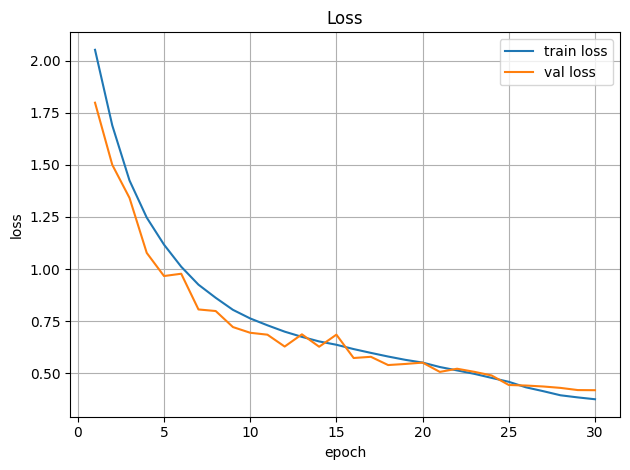

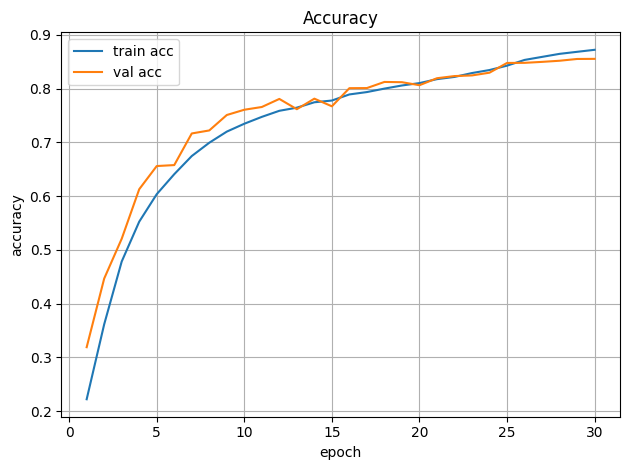

In [4]:
import argparse
from train import main
import matplotlib.pyplot as plt
import torch
from model import Model1


parser = argparse.ArgumentParser()
parser.add_argument('--data-dir', default='./data', type=str)
parser.add_argument('--save-dir', default='./checkpoints2', type=str)
parser.add_argument('--epochs', default=30, type=int)
parser.add_argument('--batch-size', default=128, type=int)
parser.add_argument('--lr', default=0.01, type=float)
parser.add_argument('--max-lr', default=0.02, type=float)      # peak LR in the cycle
parser.add_argument('--pct-start', default=0.3, type=float)    # % of steps to reach max LR
parser.add_argument('--div-factor', default=25.0, type=float)  # initial_lr = max_lr/div_factor
parser.add_argument('--final-div-factor', default=1000, type=float)  # min lr = max_lr/final_div_factor

args = parser.parse_args(args=[])

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Model1().to(device)
history = main(args, model)

save_dir = "./checkpoints2"
# --- plots ---
# 1) Loss curves
plt.figure()
plt.plot(history["epoch"], history["train_loss"], label="train loss")
plt.plot(history["epoch"], history["val_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.title("Loss"); plt.legend(); plt.grid(True)
plt.tight_layout()
#plt.savefig(save_dir / "loss_curve.png", dpi=150)

# 2) Accuracy curves
plt.figure()
plt.plot(history["epoch"], history["train_acc"], label="train acc")
plt.plot(history["epoch"], history["val_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.title("Accuracy"); plt.legend(); plt.grid(True)
plt.tight_layout()
#plt.savefig(save_dir / "accuracy_curve.png", dpi=150)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/kaggle/working/train.py:55: UserWarning: Argument(s) 'num_holes, max_h_size, max_w_size, min_h_size, min_w_size, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Total parameters: 195,946
Estimated receptive field: 45


100%|██████████| 170M/170M [00:18<00:00, 9.10MB/s] 


Epoch 1/40 | LR(s): [0.001127] | Train loss 2.0432 acc 0.2350 | Val loss 1.7999 acc 0.3198
Epoch 2/40 | LR(s): [0.002087] | Train loss 1.6762 acc 0.3703 | Val loss 1.5105 acc 0.4407
Epoch 3/40 | LR(s): [0.003613] | Train loss 1.4378 acc 0.4736 | Val loss 1.2857 acc 0.5304
Epoch 4/40 | LR(s): [0.005602] | Train loss 1.2633 acc 0.5441 | Val loss 1.1565 acc 0.5835
Epoch 5/40 | LR(s): [0.007918] | Train loss 1.1388 acc 0.5921 | Val loss 1.0678 acc 0.6126
Epoch 6/40 | LR(s): [0.010403] | Train loss 1.0422 acc 0.6297 | Val loss 0.9898 acc 0.6512
Epoch 7/40 | LR(s): [0.012888] | Train loss 0.9545 acc 0.6639 | Val loss 0.8526 acc 0.6975
Epoch 8/40 | LR(s): [0.015204] | Train loss 0.8869 acc 0.6901 | Val loss 0.8535 acc 0.6990
Epoch 9/40 | LR(s): [0.017192] | Train loss 0.8322 acc 0.7099 | Val loss 0.7663 acc 0.7323
Epoch 10/40 | LR(s): [0.018717] | Train loss 0.7930 acc 0.7247 | Val loss 0.7213 acc 0.7472
Epoch 11/40 | LR(s): [0.019674] | Train loss 0.7529 acc 0.7391 | Val loss 0.8355 acc 0.72

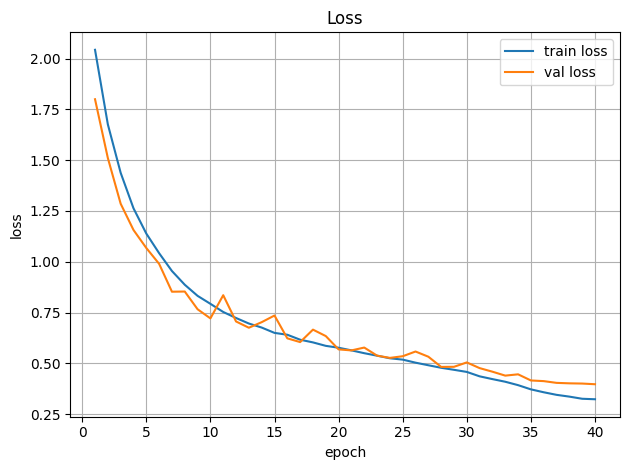

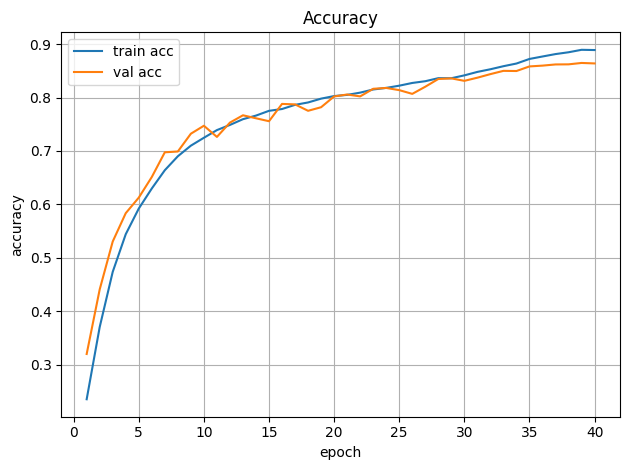

In [5]:
import argparse
from train import main
import matplotlib.pyplot as plt
import torch
from model import Model1


parser = argparse.ArgumentParser()
parser.add_argument('--data-dir', default='./data', type=str)
parser.add_argument('--save-dir', default='./checkpoints2', type=str)
parser.add_argument('--epochs', default=40, type=int)
parser.add_argument('--batch-size', default=128, type=int)
parser.add_argument('--lr', default=0.01, type=float)
parser.add_argument('--max-lr', default=0.02, type=float)      # peak LR in the cycle
parser.add_argument('--pct-start', default=0.3, type=float)    # % of steps to reach max LR
parser.add_argument('--div-factor', default=25.0, type=float)  # initial_lr = max_lr/div_factor
parser.add_argument('--final-div-factor', default=1000, type=float)  # min lr = max_lr/final_div_factor

args = parser.parse_args(args=[])

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Model1().to(device)
history = main(args, model)

save_dir = "./checkpoints2"
# --- plots ---
# 1) Loss curves
plt.figure()
plt.plot(history["epoch"], history["train_loss"], label="train loss")
plt.plot(history["epoch"], history["val_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.title("Loss"); plt.legend(); plt.grid(True)
plt.tight_layout()
#plt.savefig(save_dir / "loss_curve.png", dpi=150)

# 2) Accuracy curves
plt.figure()
plt.plot(history["epoch"], history["train_acc"], label="train acc")
plt.plot(history["epoch"], history["val_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.title("Accuracy"); plt.legend(); plt.grid(True)
plt.tight_layout()
#plt.savefig(save_dir / "accuracy_curve.png", dpi=150)